In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

In [4]:
data = Table.read('planck_srcs_RASS.out', format='ascii')

In [5]:
data

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
str18,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64
PSZ1_G071.64-42.76,337.7143,5.6854,8.82,-0.00212,0.00524,-0.4,192.8,0,0,2,5.43e+20
PSZ1_G148.20+23.49,99.4398,66.9068,8.4,0.01278,0.0072,1.77,368.21,0,0,3,5.55e+20
PSZ1_G138.60-10.85,36.7564,49.0817,8.26,0.00664,0.00475,1.4,598.14,0,0,2,1.42e+21
PSZ1_G032.15-14.93,295.8784,-7.4241,8.21,-0.00762,0.00358,-2.13,285.63,0,0,3,7.85e+20
PSZ1_G244.48+34.06,147.4657,-7.4912,8.14,0.00703,0.00534,1.32,459.88,0,0,3,4.24e+20
PSZ1_G228.24-28.77,81.9525,-25.1817,7.83,0.00057,0.00453,0.13,445.15,0,0,3,2.76e+20
PSZ1_G225.80-66.19,39.8283,-29.8144,7.77,0.00386,0.00495,0.78,405.72,0,0,3,1.88e+20
PSZ1_G246.85-12.28,107.0381,-35.6186,7.46,-0.00073,0.00368,-0.2,474.54,0,0,3,1.62e+21
PSZ1_G044.83+10.02,279.1641,15.0805,7.27,-0.00212,0.00358,-0.59,399.34,0,0,3,1.53e+21


<IPython.core.display.Javascript object>


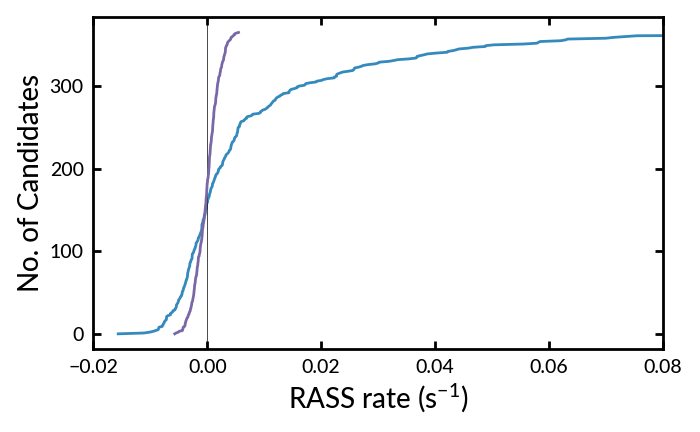

In [36]:
fig, ax = plt.subplots(figsize=(7, 7 * (np.sqrt(5.) - 1.0) / 2.0))

In [37]:
plt.plot(np.sort(data['col5']), np.arange(len(data['col5'])))
plt.xlabel('RASS rate $(s^{-1}$)')
plt.ylabel('No. of Candidates')
plt.xlim(-0.02, 0.08)
plt.axvline(0, lw=0.5)

In [38]:
plt.tight_layout()

In [63]:
std = np.std(data['col5'][data['col5'] < 0])

In [42]:
from scipy.stats import norm

In [64]:
data2 = norm.rvs(scale=std, size=len(data['col5']))

In [46]:
plt.plot(np.sort(data2), np.arange(len(data['col5'])))

Use a histogram instead

<IPython.core.display.Javascript object>


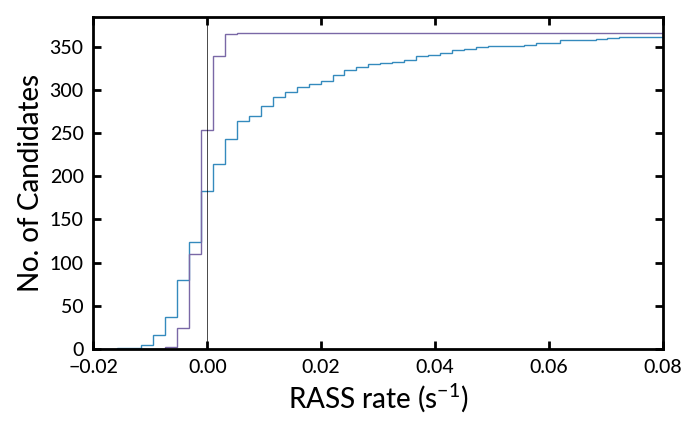

In [57]:
fig, ax = plt.subplots(figsize=(7, 7 * (np.sqrt(5.) - 1.0) / 2.0))

In [58]:
counts, edges, patches = plt.hist(data['col5'], cumulative=True, histtype='step', range=[-0.02, 0.085], bins=50)

In [59]:
plt.hist(data2, cumulative=True, bins=edges, histtype='step')

(array([  0.,   0.,   0.,   0.,   0.,   0.,   2.,  24., 110., 254., 340.,
        365., 366., 366., 366., 366., 366., 366., 366., 366., 366., 366.,
        366., 366., 366., 366., 366., 366., 366., 366., 366., 366., 366.,
        366., 366., 366., 366., 366., 366., 366., 366., 366., 366., 366.,
        366., 366., 366., 366., 366., 366.]),
 array([-0.02  , -0.0179, -0.0158, -0.0137, -0.0116, -0.0095, -0.0074,
        -0.0053, -0.0032, -0.0011,  0.001 ,  0.0031,  0.0052,  0.0073,
         0.0094,  0.0115,  0.0136,  0.0157,  0.0178,  0.0199,  0.022 ,
         0.0241,  0.0262,  0.0283,  0.0304,  0.0325,  0.0346,  0.0367,
         0.0388,  0.0409,  0.043 ,  0.0451,  0.0472,  0.0493,  0.0514,
         0.0535,  0.0556,  0.0577,  0.0598,  0.0619,  0.064 ,  0.0661,
         0.0682,  0.0703,  0.0724,  0.0745,  0.0766,  0.0787,  0.0808,
         0.0829,  0.085 ]),
 <a list of 1 Patch objects>)

In [60]:
plt.xlabel('RASS rate $(s^{-1}$)')
plt.ylabel('No. of Candidates')
plt.xlim(-0.02, 0.08)
plt.axvline(0, lw=0.5)

In [61]:
plt.tight_layout()

In [62]:
plt.savefig('rassrates', bbox='tight')